In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [4]:
df = pd.read_csv(r'C:\temperory\Students2.csv', encoding='latin1')
df.head()


,Hours,sHours,hoursplayed,income,distance,calories,Marks
0,0,6,6,146,9,2491,34
1,1,7,2,112,5,2303,36
2,1,6,1,84,7,2475,33
3,1,8,5,134,0,2282,39
4,1,8,5,104,8,2359,42


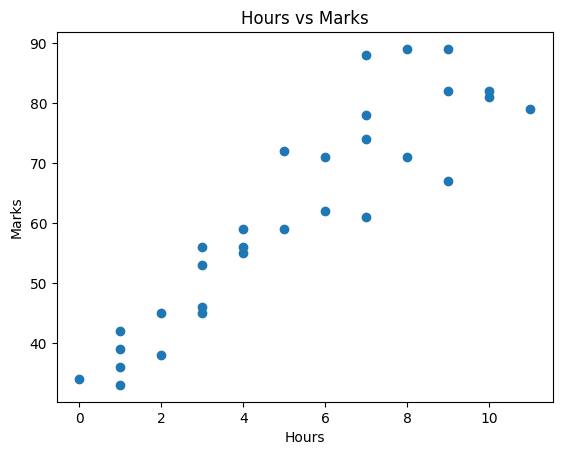

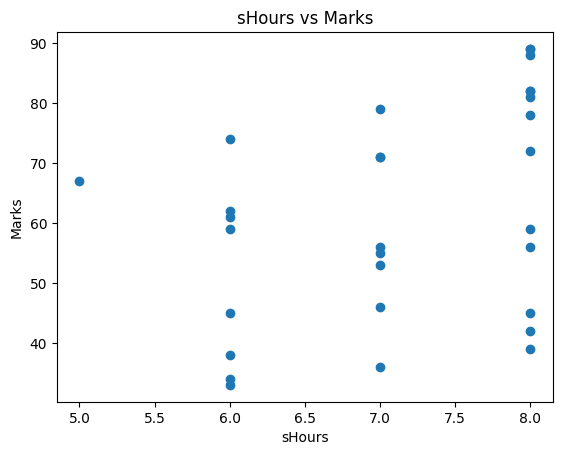

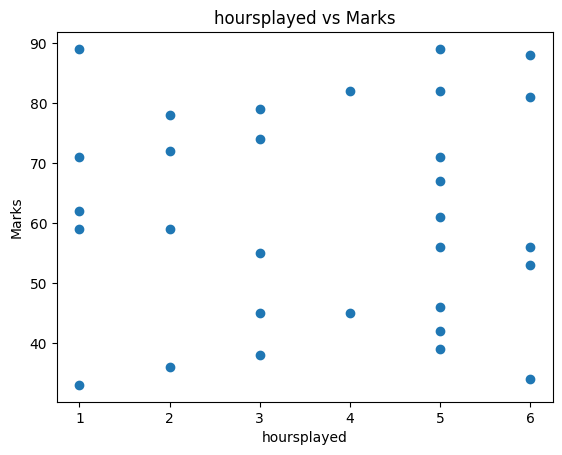

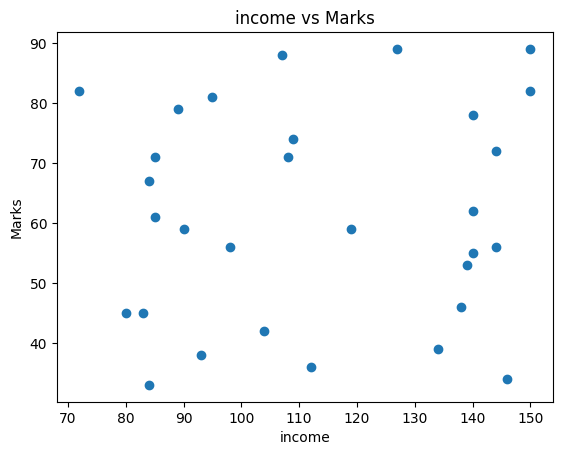

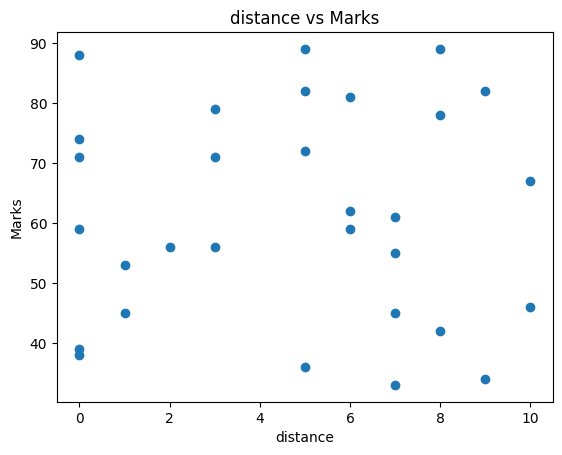

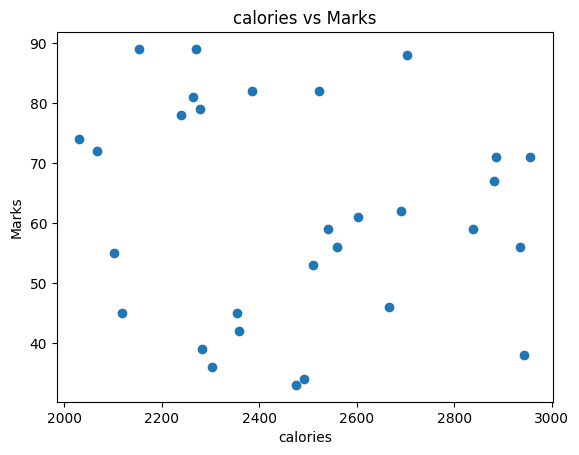

In [5]:
features = ['Hours', 'sHours', 'hoursplayed', 'income', 'distance', 'calories']

for col in features:
    plt.figure()
    plt.scatter(df[col], df['Marks'])
    plt.xlabel(col)
    plt.ylabel('Marks')
    plt.title(f'{col} vs Marks')
    plt.show()


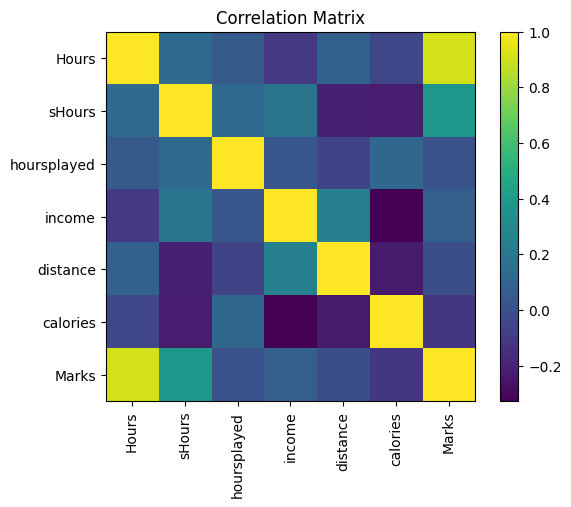

In [6]:
corr = df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


In [7]:
X = df.drop('Marks', axis=1)
y = df['Marks']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1234
)


In [16]:
from sklearn.linear_model import LinearRegression

lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

y_pred_all = lr_all.predict(X_test)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_all = math.sqrt(mean_squared_error(y_test, y_pred_all))
r2_all   = r2_score(y_test, y_pred_all)

print("Before Feature Selection")
print("RMSE :", rmse_all)
print("R² Score :", r2_all)


Before Feature Selection
RMSE : 6.9822067153574645
R² Score : 0.8427485982415712


In [18]:
from sklearn.feature_selection import f_regression as fr

result = fr(X, y)
f_score = result[0]
p_values = result[1]


In [19]:
columns = list(X.columns)

print("\n Features      F_score    P_value ")
print(" --------      -------    ------- ")

for i in range(len(columns)):
    f1 = "%4.2f" % f_score[i]
    p1 = "%2.6f" % p_values[i]
    print(" ", columns[i].ljust(12), f1.rjust(8), p1.rjust(10))



 Features      F_score    P_value 
 --------      -------    ------- 
  Hours          141.91   0.000000
  sHours           4.57   0.041403
  hoursplayed      0.00   0.969907
  income           0.16   0.692200
  distance         0.00   0.955528
  calories         0.40   0.530086


In [20]:
X_train_n = X_train[['Hours', 'sHours']]
X_test_n  = X_test[['Hours', 'sHours']]


In [21]:
lr_sel = LinearRegression()
lr_sel.fit(X_train_n, y_train)

y_pred_sel = lr_sel.predict(X_test_n)


In [22]:
rmse_sel = math.sqrt(mean_squared_error(y_test, y_pred_sel))
r2_sel   = r2_score(y_test, y_pred_sel)

print("\nAfter Feature Selection")
print("RMSE :", rmse_sel)
print("R² Score :", r2_sel)



After Feature Selection
RMSE : 5.097217281081126
R² Score : 0.9161939417709496


In [23]:
print("\n--- Model Comparison ---")
print("RMSE Before :", rmse_all)
print("RMSE After  :", rmse_sel)

print("R² Before :", r2_all)
print("R² After  :", r2_sel)



--- Model Comparison ---
RMSE Before : 6.9822067153574645
RMSE After  : 5.097217281081126
R² Before : 0.8427485982415712
R² After  : 0.9161939417709496
